# Logistic Regression

## Reading the data

In [4]:
import pandas as pd
import numpy as np
import torch

filepath = '/workspaces/eng-ai-agents/assignments/assignment-1/data/train.gz'

# Read training data
dataset = pd.read_csv(filepath)

dataset.head()
    

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


## Correlation map  

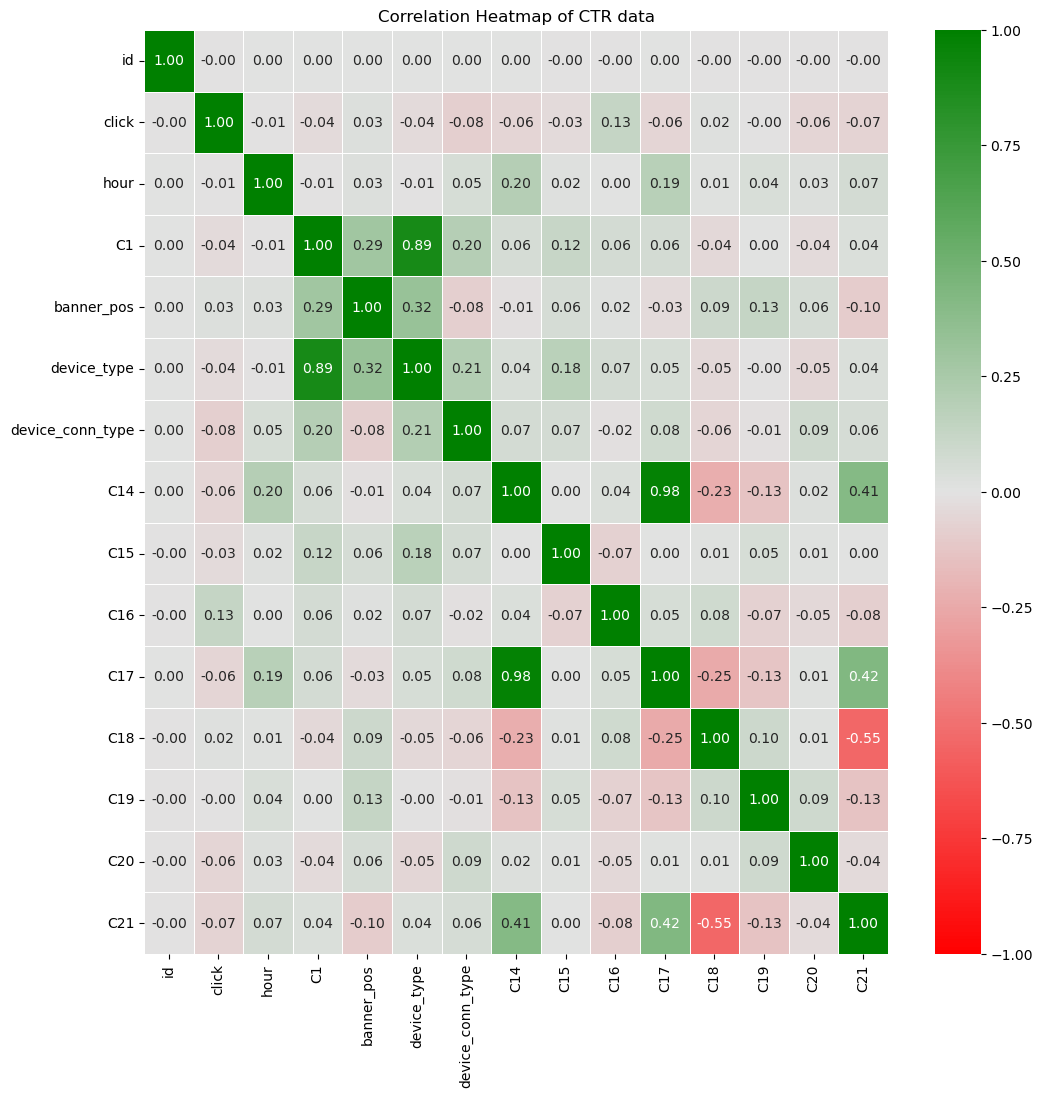

In [9]:
#Correlation
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Define custom colors for the colormap
colors = ["red", "#e2e2e2", "green"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_rg", colors)

# Calculate the correlation matrix
corr = dataset.corr( numeric_only=True)

# Create a heatmap using the custom colormap and setting color range
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of CTR data')
plt.show()

## Data cleaning

* Using minimal features due to the curse of dimensionality. 
* Using one hot encoding for categorical data 

In [ ]:

# Using minimal features due to curse of dimensionality 
features = ['click', 'banner_pos', 'device_type', 'device_conn_type', 'C1', 'C16']
cols_to_encode = ['banner_pos', 'device_type', 'device_conn_type', 'C1', 'C16']


df_simple = dataset[features]

# Using one hot encoding for data, need to specify colums to encode since there are some integers
df_encoded = pd.get_dummies(df_simple, columns=cols_to_encode, drop_first=True)

df_encoded.head()

,click,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,device_type_1,device_type_2,device_type_4,...,C1_1010,C1_1012,C16_36,C16_50,C16_90,C16_250,C16_320,C16_480,C16_768,C16_1024
0,0,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1,0,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,True,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


## Logistic regression

